### Project: Flipkart Reviews Sentiment Analysis using Python


### Objective:
<h5>Objective: Develop a Machine Learning model to analyze Flipkart product
reviews and classify them as positive or negative based on user sentiment.</h5>


### Dataset: <a href="https://drive.google.com/file/d/1Te_2esaIGuhohwBE45mmJ8Y42Dkp-L7f/view">Flipkart Reviews Dataset</a>


### Project Goals:
<h5>1. Importing Necessary Libraries and Dataset:<br>
3. Exploratory Data Analysis (EDA):<br>
4. Model Training and Selection:<br>
5. Model Evaluation and Prediction:</h5>




# Get Started #

<h1>1. Importing Necessary Libraries and Dataset:</h1>

In [2]:
# Load required Python libraries:

import pandas as pd                                             # Pandas for handling datasets.
import matplotlib.pyplot as plt                                 # Matplotlib/Seaborn for data visualization.
import seaborn as sns                                           # Matplotlib/Seaborn for data visualization.
from wordcloud import WordCloud                                 # WordCloud for visualizing common words in reviews.
import warnings                                                 # Warnings to suppress unnecessary messages.
import re
import nltk
from nltk.corpus import stopwords

### Load the dataset using Pandas and explore its structure.

In [3]:
# Load the dataset using Pandas and explore its structure.

try:
    df = pd.read_csv('flipkart_data.csv')
    print("First 5 Rows\n")
    print(df.head())
    
except FileNotFoundError:
    print("Error: File not found please ensure the file is in same directory")
    
# Info of the dataset

print("\n Info of the datset")
print(df.info())
print(df.shape)

First 5 Rows

                                              review  rating
0  It was nice produt. I like it's design a lot. ...       5
1  awesome sound....very pretty to see this nd th...       5
2  awesome sound quality. pros 7-8 hrs of battery...       4
3  I think it is such a good product not only as ...       5
4  awesome bass sound quality very good bettary l...       5

 Info of the datset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9976 entries, 0 to 9975
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  9976 non-null   object
 1   rating  9976 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 156.0+ KB
None
(9976, 2)


<h1>2. Data Preprocessing:</h1>

### Remove missing values and duplicate entries.

In [4]:
# Dataset before clining

before = len(df)
print("\n Before dropping missing and duplicated reviews")
print(before)
print(df.shape)

# Drop row with  missing reviews
df = df.dropna(subset=['review', 'rating'])

# Drop row with duplicates reviews and keep first occurence
df = df.drop_duplicates(subset='review', keep='first')

after = len(df)
print("\n After dropping missing and duplicated reviews")
print(after)
print(df.shape)

print(f"\n Removed {before - after} rows. Remaining: {after}")


 Before dropping missing and duplicated reviews
9976
(9976, 2)

 After dropping missing and duplicated reviews
7694
(7694, 2)

 Removed 2282 rows. Remaining: 7694


### Convert text into lowercase and remove stopwords, punctuation, and special characters.

In [5]:
# Convert text into lowercase and remove stopwords, punctuation, and special characters.

# One-time downloads 
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))


def clean_text(text):
    text = text.lower() # to make the uppercase letter to lowercase
    text = re.sub(r'[^a-z\s]', '', text)
    text = " ".join(words for words in text.split() if words not in stop_words)
    return text

# create the cleaned text column without losing original

df['clean_review'] = df['review'].apply(clean_text)

print("\n after clining reviews")
df['clean_review'].head(5)



 after clining reviews


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    nice produt like design lot easy carry looked ...
1    awesome soundvery pretty see nd sound quality ...
2    awesome sound quality pros hrs battery life in...
3    think good product per quality also design qui...
4    awesome bass sound quality good bettary long l...
Name: clean_review, dtype: object

### Encode sentiment labels (Positive = 1, Negative = 0).

In [6]:
# Encode sentiment labels (Positive=1, Negative=0)

def rating_to_sentiment(r):
    if r >= 4:
        return "Positive"
    elif r <= 2:
        return "Negative"
    else:
        return "Neutral"


# Ceate new column named as sentiment text so store the 'Positive' and 'Negtive'
df["sentiment_text"] = df["rating"].apply(rating_to_sentiment)
    

# drop the neutral rows for the clear classification 
df_bin = df[df["sentiment_text"] != "Neutral"].copy()


# Encode sentiment labels (Positive = 1, Negative = 0).
label_map = {"Negative": 0, "Positive": 1}
df_bin["sentiment"] = df_bin["sentiment_text"].map(label_map).astype(int)


print(df_bin['sentiment_text'].value_counts())
df_bin[["rating", "sentiment_text", "sentiment"]].head(5)


sentiment_text
Positive    6076
Negative     894
Name: count, dtype: int64


,rating,sentiment_text,sentiment
0,5,Positive,1
1,5,Positive,1
2,4,Positive,1
3,5,Positive,1
4,5,Positive,1


### Tokenize text data using TF-IDF (Term Frequency-Inverse Document Frequency).

In [7]:
# Tokenize text data using TF-IDF (Term Frequency-Inverse Document Frequency).

from sklearn.feature_extraction.text import TfidfVectorizer

# Keep 5000  most important words
tfidf = TfidfVectorizer(max_features=5000)

X = tfidf.fit_transform(df_bin["clean_review"])

y = df_bin["sentiment"].values

print(X.shape, y.shape)

(6970, 5000) (6970,)


### Split dataset into training (80%) and testing (20%) sets.

In [8]:
# Split dataset into training (80%) and testing (20%) sets.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.mean(), y_test.mean())

(5576, 5000) (1394, 5000) 0.8705164992826399 0.8766140602582496


<h1>3. Exploratory Data Analysis (EDA):</h1>

### Visualize sentiment distribution using count plots.

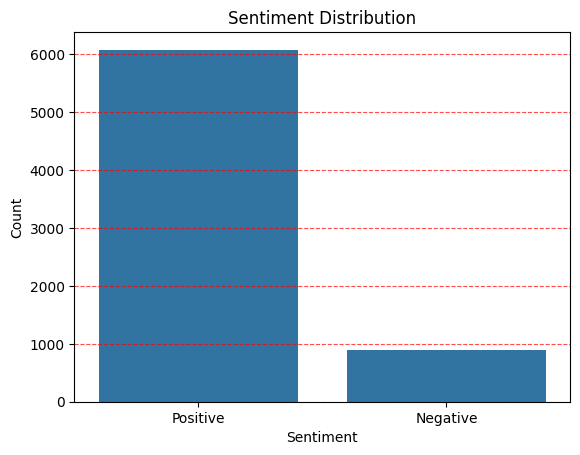

In [9]:
# Visualize sentiment distribution using count plots.

sns.countplot(x=df_bin['sentiment_text'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', color='red', alpha=0.7)
plt.show()

### Create a word cloud to identify common words in positive and negative reviews.

<function matplotlib.pyplot.show(close=None, block=None)>

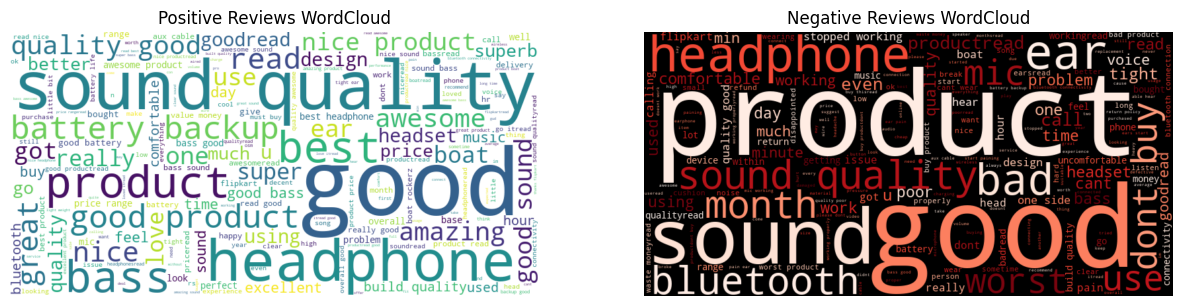

In [10]:
# Create a word cloud to identify common words in positive and negative reviews.

# Positive reviews
pos_text = " ".join(df_bin[df_bin['sentiment'] == 1]['clean_review'])
pos_wc = WordCloud(width=800, height=400, background_color='white').generate(pos_text)

# Negative reviews
neg_text = " ".join(df_bin[df_bin['sentiment'] == 0]['clean_review'])
neg_wc = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(neg_text)


# Plot Negative and Positive
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
plt.imshow(pos_wc, interpolation='bilinear')
plt.title("Positive Reviews WordCloud")
plt.axis("off")


plt.subplot(1,2,2)
plt.imshow(neg_wc, interpolation='bilinear')
plt.title("Negative Reviews WordCloud")
plt.axis("off")


plt.show


### Analyze correlations between review length and sentiment.

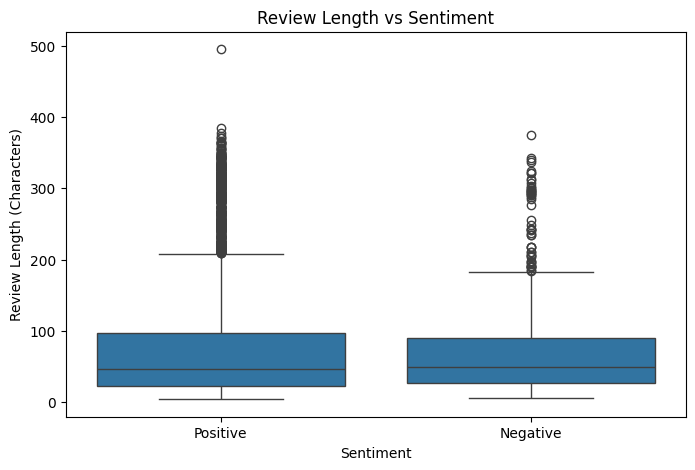

In [11]:
# Analyze correlations between review length and sentiment.

# Calculate review lengths

df_bin['review_length'] = df_bin['clean_review'].apply(len)

# Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x='sentiment_text', y='review_length', data=df_bin)
plt.title("Review Length vs Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Review Length (Characters)")
plt.show()

<h1>4. Model Training and Selection:</h1>

### • Train different machine learning models: 

### Logistic Regression
### Naïve Bayes
### Random Forest Classifier
### Support Vector Machine (SVM)


In [12]:
# Import the necessary libraries

from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score


# we create a dictionary and placed all the model into it
models = {
    "Logistic Regression": LinearRegression(),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}

results = {}


# train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test).round()
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    results[name] ={"Accuracy": accuracy, "F1-Score":f1}
    print(f"{name} Trained.")
    

Logistic Regression Trained.
Naive Bayes Trained.
Random Forest Trained.
SVM Trained.


### Compare model performance using accuracy and F1-score.


In [13]:
# Print the result which model performs well
print("\n Model Comparison")
for name, metrics in results.items():
    print(f"{name}: Accuracy = {metrics['Accuracy']:.4f}, F1-Score = {metrics['F1-Score']:.4f}")
    

# Add the results into the DataFrames to cleaner look

results_df = pd.DataFrame(results).T
print("\n")
print(results_df)


 Model Comparison
Logistic Regression: Accuracy = 0.7776, F1-Score = 0.8229
Naive Bayes: Accuracy = 0.8902, F1-Score = 0.8495
Random Forest: Accuracy = 0.9340, F1-Score = 0.9256
SVM: Accuracy = 0.9326, F1-Score = 0.9222


                     Accuracy  F1-Score
Logistic Regression  0.777618  0.822922
Naive Bayes          0.890244  0.849517
Random Forest        0.934003  0.925640
SVM                  0.932568  0.922150


<h1>5. Model Evaluation and Prediction:</h1>

### • Evaluate the best model using: 
### Accuracy Score
### Precision, Recall, F1-Score
### Confusion Matrix


 Classification Report for Random Forest
              precision    recall  f1-score   support

    Negative       0.92      0.51      0.66       172
    Positive       0.94      0.99      0.96      1222

    accuracy                           0.93      1394
   macro avg       0.93      0.75      0.81      1394
weighted avg       0.93      0.93      0.93      1394


 Confusion Matrix


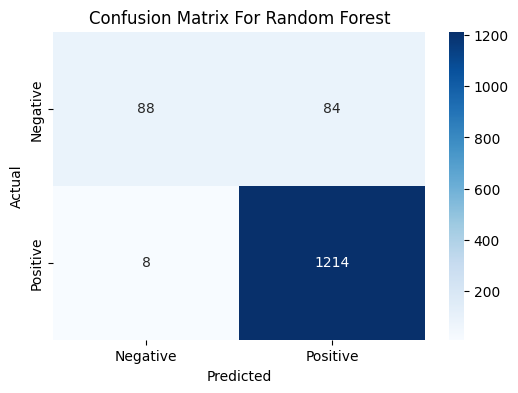

In [14]:
# import libraries

from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Select the best model

best_model =models['Random Forest']


# predicts on the new set
y_pred = best_model.predict(X_test)

# print classification report
print("\n Classification Report for Random Forest")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))


# Plot the confusion matrix
print("\n Confusion Matrix")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(data=cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix For Random Forest')
plt.show()

### Test the model on new reviews to classify sentiment as positive or negative

In [15]:
# 3. Test with New Reviews
print("\n Test with new review")

new_reviews = [
    "This product is amazing, I love it!",
    "Worst purchase ever, completely useless.",
    "It's okay, not great but not bad either.",
    "Sound quality is superb and battery life is long."
]


# preprocess and transform the new reviews
cleaned_reviews = [clean_text(review) for review in new_reviews]
new_reviews_tfidf = tfidf.transform(cleaned_reviews)


# predict sentiment
predictions = best_model.predict(new_reviews_tfidf)
sentiment_labels = {
    0 : 'Negative',
    1 : 'Positive'
}

for review, prediction in zip(new_reviews, predictions):
    print(f"Review: '{review}' -> Predicted Sentiment: {sentiment_labels[prediction]}")



 Test with new review
Review: 'This product is amazing, I love it!' -> Predicted Sentiment: Positive
Review: 'Worst purchase ever, completely useless.' -> Predicted Sentiment: Negative
Review: 'It's okay, not great but not bad either.' -> Predicted Sentiment: Negative
Review: 'Sound quality is superb and battery life is long.' -> Predicted Sentiment: Positive


<h1>Save Dataset</h1>

In [16]:
df.to_csv('cleaned_flipkart_analysis.csv')

<h1>Conclusion:</h1>

# Project Success

We built a smart system that automatically reads Flipkart reviews and determines if customers are happy or unhappy with their purchases.

## Key Results

Our Random Forest model achieved **93.4% accuracy** – getting it right 93 out of every 100 times. This was the best performer among four different approaches we tested.

## Real Impact

Instead of businesses spending weeks manually reading thousands of reviews, our model does it in minutes. This helps companies quickly identify problems, understand customer feedback, and make improvements faster.

## Next Steps

Future work could explore advanced models like LSTMs or Transformers, which are better at understanding language nuances and could potentially achieve even higher accuracy.